# 🧽 Limpieza de Datos y Visualización con Plotly

## 📦 Librerías necesarias

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import plotly.express as px
import plotly.graph_objects as gp
import plotly.io as pio
pio.renderers.default='browser'
warnings.filterwarnings('ignore')

## 📂 Dataset 1: Errores comunes — Nulos, duplicados, formatos

In [3]:
raw_data = {
    'Nombre': [' Ana ', 'Luis', 'Luis', 'marta', None, 'PEDRO',
               ' Clara', 'jose', 'JOSE ', '   Alba', 'LUCIA', 'lucia'],
    'Edad':   [25, 30, 30, None, 22, 41,
               27, 29, 29, 24, None, 24],
    'Genero': ['F', 'M', 'M', 'f', 'Femenino', 'Masculino',
               'f', 'M', 'masculino', 'F', 'femenino', 'F'],
    'Fecha_registro': ['2023/01/15', '15-01-2023', '15-01-2023', '2023/01/16',
                       '2023-01-17', '16/01/2023', '2023-01-18', '17/01/2023',
                       '2023-01-19', '18-01-2023', '2023/01/20', '2023-01-20']
}

### 🧹 Limpieza de nulos y duplicados


In [4]:
df1 = pd.DataFrame(raw_data)
df1

,Nombre,Edad,Genero,Fecha_registro
0,Ana,25.0,F,2023/01/15
1,Luis,30.0,M,15-01-2023
2,Luis,30.0,M,15-01-2023
3,marta,NaN,f,2023/01/16
4,None,22.0,Femenino,2023-01-17
5,PEDRO,41.0,Masculino,16/01/2023
6,Clara,27.0,f,2023-01-18
7,jose,29.0,M,17/01/2023
8,JOSE,29.0,masculino,2023-01-19
9,Alba,24.0,F,18-01-2023


In [5]:
df1.isna().sum().sort_values(ascending=False)

Edad              2
Nombre            1
Genero            0
Fecha_registro    0
dtype: int64

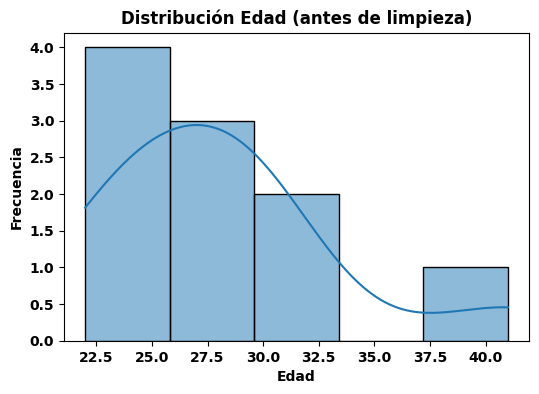

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(df1['Edad'], kde=True, bins=5)
plt.title('Distribución Edad (antes de limpieza)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [7]:
df1['Edad'] = df1['Edad'].fillna(df1['Edad'].median())


In [8]:
df1.isna().sum().sort_values(ascending=False)

Nombre            1
Edad              0
Genero            0
Fecha_registro    0
dtype: int64

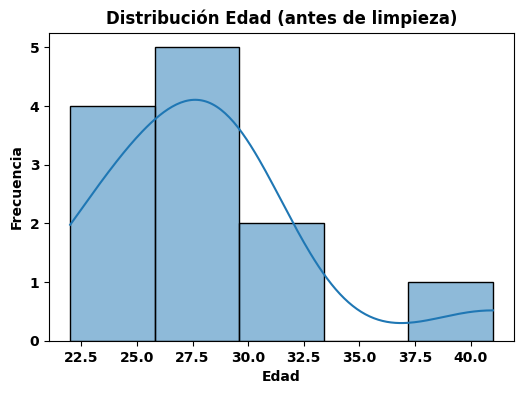

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df1['Edad'], kde=True, bins=5)
plt.title('Distribución Edad (antes de limpieza)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

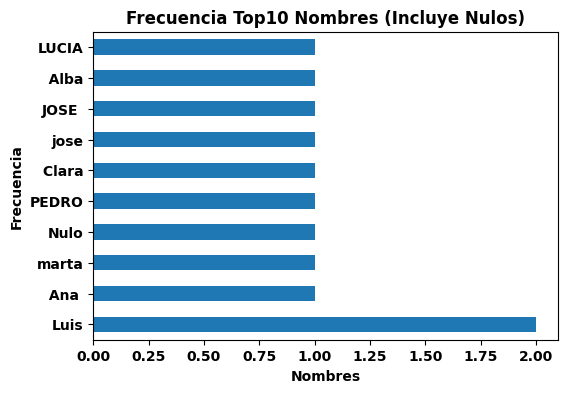

In [10]:
plt.figure(figsize=(6,4))
nombres_temp = df1['Nombre'].fillna('Nulo')
nombres_temp.value_counts().head(10).plot(kind='barh')
plt.title('Frecuencia Top10 Nombres (Incluye Nulos)')
plt.xlabel('Nombres')
plt.ylabel('Frecuencia')
plt.show()

In [11]:
df1 = df1.dropna(subset=['Nombre'])

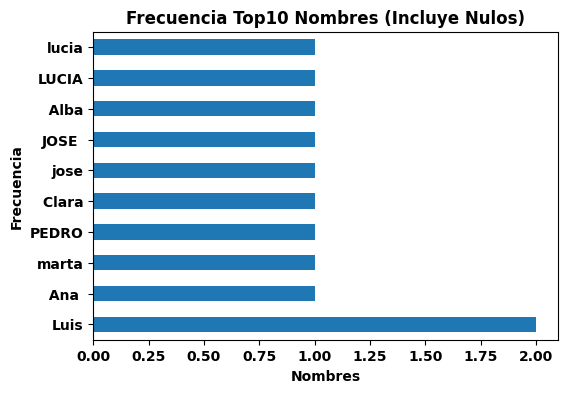

In [12]:
plt.figure(figsize=(6,4))
nombres_temp = df1['Nombre'].fillna('Nulo')
nombres_temp.value_counts().head(10).plot(kind='barh')
plt.title('Frecuencia Top10 Nombres (Incluye Nulos)')
plt.xlabel('Nombres')
plt.ylabel('Frecuencia')
plt.show()

In [13]:
df1.isna().sum().sort_values(ascending=False)

Nombre            0
Edad              0
Genero            0
Fecha_registro    0
dtype: int64

### 🧹 Limpieza de texto y categorías


In [14]:
print('Nombres:',df1.Nombre.unique())
print('Generos:',df1.Genero.unique())

Nombres: [' Ana ' 'Luis' 'marta' 'PEDRO' ' Clara' 'jose' 'JOSE ' '   Alba' 'LUCIA'
 'lucia']
Generos: ['F' 'M' 'f' 'Masculino' 'masculino' 'femenino']


In [15]:
df1['Nombre'] = df1['Nombre'].str.strip().str.capitalize()

In [16]:
df1['Genero'] = df1['Genero'].str.lower().replace({'femenino':'f',
                                                   'masculino':'m'})

In [17]:
df1

,Nombre,Edad,Genero,Fecha_registro
0,Ana,25.0,f,2023/01/15
1,Luis,30.0,m,15-01-2023
2,Luis,30.0,m,15-01-2023
3,Marta,28.0,f,2023/01/16
5,Pedro,41.0,m,16/01/2023
6,Clara,27.0,f,2023-01-18
7,Jose,29.0,m,17/01/2023
8,Jose,29.0,m,2023-01-19
9,Alba,24.0,f,18-01-2023
10,Lucia,28.0,f,2023/01/20


### 🧹 Conversión de fechas


In [18]:
df1['Fecha_registro'] = pd.to_datetime(df1['Fecha_registro'], format='mixed',dayfirst=True, errors='coerce')
df1

,Nombre,Edad,Genero,Fecha_registro
0,Ana,25.0,f,2023-01-15
1,Luis,30.0,m,2023-01-15
2,Luis,30.0,m,2023-01-15
3,Marta,28.0,f,2023-01-16
5,Pedro,41.0,m,2023-01-16
6,Clara,27.0,f,2023-01-18
7,Jose,29.0,m,2023-01-17
8,Jose,29.0,m,2023-01-19
9,Alba,24.0,f,2023-01-18
10,Lucia,28.0,f,2023-01-20


In [ ]:
def convertir_fecha(fecha):
    for formato in ['%Y-%m-%d', '%d/%m/%Y', '%d-%m-%Y', '%Y-%d-%m', '%m/%d/%Y', '%Y/%m/%d', '%Y/%M/%d', '%Y/%M/%D', '%y/%m/%d']:
        try:
            return pd.to_datetime(fecha, format=formato)
        except ValueError:
            continue
    return pd.NaT  # Si no coincide con ningún formato

# Aplicar la función a la columna, asegurando que el DataFrame se mantenga
df1['Fecha_registro'] = df1['Fecha_registro'].apply(convertir_fecha)

# Convertir las fechas al formato deseado y sobrescribir la columna original
df1['Fecha_registro'] = pd.to_datetime(df1['Fecha_registro'], dayfirst=True, errors='coerce')

#df = df.set_index('Fecha_registro')

df1

,Nombre,Edad,Genero,Fecha_registro
0,Ana,25.0,f,2023-01-15
1,Luis,30.0,m,2023-01-15
2,Luis,30.0,m,2023-01-15
3,Marta,28.0,f,2023-01-16
5,Pedro,41.0,m,2023-01-16
6,Clara,27.0,f,2023-01-18
7,Jose,29.0,m,2023-01-17
8,Jose,29.0,m,2023-01-19
9,Alba,24.0,f,2023-01-18
10,Lucia,28.0,f,2023-01-20


### 🧹 Limpieza de duplicados

In [21]:
print(df1.duplicated().sum())

1


In [22]:
duplicados = df1.duplicated().sum()

In [24]:
if duplicados > 0:
    display(df1[df1.duplicated(keep=False)])
else:
    print('No hay duplicados')

,Nombre,Edad,Genero,Fecha_registro
1,Luis,30.0,m,2023-01-15
2,Luis,30.0,m,2023-01-15


In [25]:
df1 = df1.drop_duplicates(keep='first')
df1

,Nombre,Edad,Genero,Fecha_registro
0,Ana,25.0,f,2023-01-15
1,Luis,30.0,m,2023-01-15
3,Marta,28.0,f,2023-01-16
5,Pedro,41.0,m,2023-01-16
6,Clara,27.0,f,2023-01-18
7,Jose,29.0,m,2023-01-17
8,Jose,29.0,m,2023-01-19
9,Alba,24.0,f,2023-01-18
10,Lucia,28.0,f,2023-01-20
11,Lucia,24.0,f,2023-01-20


### 📊 Visualizaciones con Plotly tras limpieza de datos


### 🔍 Distribución de edades

In [29]:
fig = px.histogram(df1,
                   x='Edad',
                   nbins=10,
                   title='Distribución de edades (Post limpieza)')
fig.show()


### 🔍 Registros por fecha



In [30]:
fig = px.histogram(df1,
                   x='Fecha_registro',
                   nbins=10,
                   title='Registros por fecha (Post limpieza)')
fig.show()

## 📂 Dataset 2: Categóricas desordenadas

In [ ]:
df2 = pd.DataFrame({
    'categoria': ['Premium', 'premium', 'PREMIUM', 'Basico', 'básico', 'Standard', 'standard', 'standar', 'STÁNDAR'],
    'ventas': np.random.randint(100, 1000, 9)
})

### 🧹 Normalización de categorías


### 📊 Visualización: Pareto de ventas por categoría

## 📂 Dataset 3: Datos temporales con errores

In [ ]:
# 1. Creamos un rango completo del 1 al 10 de enero
fechas_base = pd.date_range(start='2023-01-01', end='2023-01-10')

# 2. Eliminamos manualmente algunas fechas para simular días perdidos
fechas_erroneas = fechas_base.delete([2, 5])  # elimina 3 y 6 de enero (index 2 y 5)

# 3. Añadimos duplicados intencionados
fechas_erroneas = list(fechas_erroneas) + [pd.Timestamp('2023-01-05'), pd.Timestamp('2023-01-02')]

# 4. Creamos el DataFrame
df3 = pd.DataFrame({
    'fecha': fechas_erroneas,
    'visitas': np.random.randint(50, 200, len(fechas_erroneas))
})

# 5. Desordenamos filas
df3 = df3.sample(frac=1).reset_index(drop=True)

### 🧹 Tratamiento de fechas duplicadas y faltantes

### 📊 Visualización: Evolución temporal de visitas

## 📅 Comparación por subgrupos temporales
